# Model Evaluation Metrics For Regression

### Types

1. $ R^2 $ (default error)
2. MSE(Mean Squared Error)
3. RMSE(Root Mean Squared Error)
4. MAE(Mean Absolute Error)
5. MAPE(Mean Absolute Percentage Error


In [1]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data['data']
y = data['target']



In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

reg = LinearRegression()
forest = RandomForestRegressor()



In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

reg.fit(X_train, y_train)
forest.fit(X_train,y_train)




0.7966777243325422

#### Calculating Percentage of data that can be explained by the model
-- by default  $ R^2 $ Score(COD) used 

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{total}} $$
#### Where
### $$ SS_{res} = \sum_{i=1}^{n}(y_i - \hat{y_i})^2 $$ and $$ SS_{total} = \sum_{i=1}^{n}(y_i - \overline{y})^2 $$

In [19]:
reg.score(X_test, y_test)

0.5911671870052468

In [18]:
forest.score(X_test, y_test)

0.7966777243325422

In [21]:
import numpy as np

y_pred = reg.predict(X_test)

SSR_reg = sum((y_test-y_pred) ** 2)
SST_reg = sum((y_test-np.mean(y_test)) ** 2)

R2_reg = 1 - (SSR_reg / SST_reg)
R2_reg

np.float64(0.591167187005246)

#### Calculating using Adjusted $ R^2 $ Method

### $$ R^2_{adj} = 1 - \frac{(1-R^2)(n-1)}{n-p-1} $$ 

Where $ R^2 $ - firstly getting result, n - number of data, p - number of parameters

In [25]:
n = X_test.shape[0] # data
p = X_test.shape[1] # parameters

R2_adj_reg = 1 - ((1 - R2_reg) * (n-1) / (n - p - 1))

R2_adj_reg


np.float64(0.5903731441540787)

#### MSE (Mean Squared Error)

### $$ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

In [43]:
from sklearn.metrics import mean_squared_error

Mse = mean_squared_error(y_test, y_pred)
Mse_manual = 1 / n * sum((y_test - y_pred) ** 2)
print(Mse, Mse_manual)

0.5234325433298069 0.5234325433298075


#### RMSE (Root Mean Squared Error)

### $$ \sqrt{\frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 } $$


In [42]:
import math
from sklearn.metrics import root_mean_squared_error

Rmse = root_mean_squared_error(y_test, y_pred)

Rmse_manual = math.sqrt(1/n * sum((y_test - y_pred)**2))
print(Rmse, Rmse_manual)

0.7234863808875789 0.7234863808875793


#### MAE(Mean Absolute Error)

### $$ \frac{1}{n}\sum_{i=1}^{n} (\left\lvert{y_i-\hat{y}_i}\right\rvert) $$


In [39]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred)

MAE_manual = 1/n * sum(abs(y_test - y_pred))
print(MAE, MAE_manual)

0.5246103533425116 0.5246103533425107


#### MAPE(Mean absolute percentage error):

### $$ \frac{1}{n} \sum_{i=1}^{n}(\left\lvert{\frac{y_i-\hat{y}_i}{y_i}}\right\rvert) $$

In [37]:
from sklearn.metrics import mean_absolute_percentage_error

MAPE = mean_absolute_percentage_error(y_test, y_pred)
MAPE_manual = 1/n * sum(abs((y_test - y_pred)/ (y_test)))
print(MAPE, MAPE_manual)


0.32411860189322567 0.3241186018932256


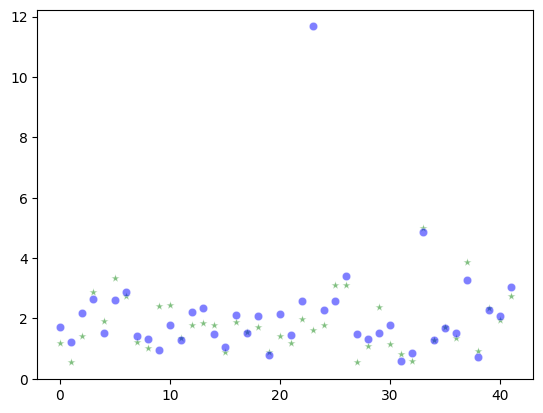

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(y_test[::-100], marker='*', color='green', alpha=0.5)
sns.scatterplot(y_pred[::-100], marker='o', color='blue', alpha=0.5)
plt.show()

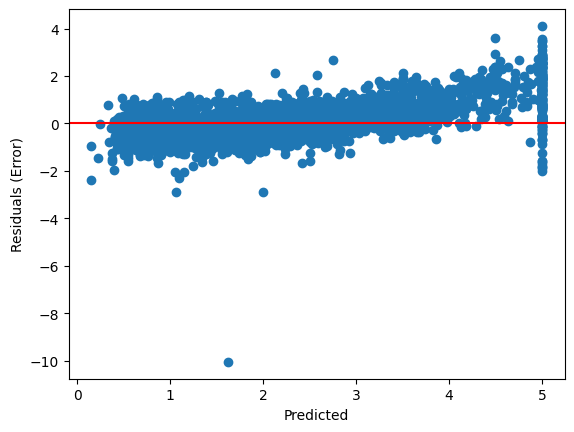

In [58]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals (Error)")
plt.show()
